# Import datasets and function

In [51]:
import os
import scipy
import numpy as np

import io
import requests
import xarray as xr
import seaborn as sns #for heatmap
import statsmodels.api as sm # for OLS

import datetime as dt
from dateutil.relativedelta import *

import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [52]:
#input dataset
seagrass1 = "data1.nc"
seagrass2 = "data2.nc"
seagrass3 = "data3.nc"
seagrass4 = "data4.nc"
#read dataset
data1 = xr.open_dataset(seagrass1) #site 1
data2 = xr.open_dataset(seagrass2) #site 2
data3 = xr.open_dataset(seagrass3) #site 3
data4 = xr.open_dataset(seagrass4) #site 4

In [53]:
site1 = data1.mean(['j','i'])
site2 = data2.mean(['j','i'])
site3 = data3.mean(['j','i'])
site4 = data4.mean(['j','i'])

# Relationship between seagrass growth rate and temperature/ salinity/ light

Ordinary Least Square (OLS) regressions were conducted on seagrass growth rates and temperature/ salinity/ light at each of the 4 study sites to see the relationship between the variables.

Site 1

In [54]:
#seagrass growth rate VS. temperature in site 1
X1=site1['SGD_N_gr'].values.reshape(-1,1)
x1=sm.add_constant(X1)
y1=site1['temp'].values.reshape(-1,1)
model1=sm.OLS(y1,x1,missing='drop').fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     369.3
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           8.59e-72
Time:                        01:23:19   Log-Likelihood:                -2541.1
No. Observations:                1178   AIC:                             5086.
Df Residuals:                    1176   BIC:                             5096.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1648      0.125    201.359      0.000      24.920      25.410
x1          1.165e+06   6.06e+04     19.218      0.000    1.05e+06    1.28e+06
==============================================================================
Omnibus:                      560.076   Durbin-Watson:                   0.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.568
Skew:                          -0.027   Prob(JB):                     1.57e-14
Kurtosis:                       1.863   Cond. No.                     9.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [55]:
y1_temp=1.165e+06*site1['SGD_N_gr']+25.1648

In [56]:
#seagrass growth rate VS. salt in site 1
X1=site1['SGD_N_gr'].values.reshape(-1,1)
x1=sm.add_constant(X1)
y1=site1['salt'].values.reshape(-1,1)
model1=sm.OLS(y1,x1,missing='drop').fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     45.77
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           2.09e-11
Time:                        01:23:19   Log-Likelihood:                -1088.8
No. Observations:                1178   AIC:                             2182.
Df Residuals:                    1176   BIC:                             2192.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8674      0.036    957.221      0.000      34.796      34.939
x1          1.196e+05   1.77e+04      6.765      0.000    8.49e+04    1.54e+05
==============================================================================
Omnibus:                      346.626   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              907.614
Skew:                          -1.540   Prob(JB):                    8.21e-198
Kurtosis:                       6.000   Cond. No.                     9.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
y1_salt=1.196e+05*site1['SGD_N_gr']+34.8674

In [58]:
#seagrass growth rate VS. light in site 1
X1=site1['SGD_N_gr'].values.reshape(-1,1)
x1=sm.add_constant(X1)
y1=site1['EpiPAR_sg'].values.reshape(-1,1)
model1=sm.OLS(y1,x1,missing='drop').fit()

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     3535.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:23:20   Log-Likelihood:                -3198.4
No. Observations:                1178   AIC:                             6401.
Df Residuals:                    1176   BIC:                             6411.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0759      0.218     -0.347      0.728      -0.504       0.353
x1          6.299e+06   1.06e+05     59.453      0.000    6.09e+06    6.51e+06
==============================================================================
Omnibus:                      326.455   Durbin-Watson:                   0.673
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1437.110
Skew:                           1.240   Prob(JB):                         0.00
Kurtosis:                       7.809   Cond. No.                     9.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
y1_light=6.299e+06*site1['SGD_N_gr']-0.0759

Site 2

In [60]:
#seagrass growth rate VS. temperature in site 2
X2=site2['SGD_N_gr'].values.reshape(-1,1)
x2=sm.add_constant(X2)
y2=site2['temp'].values.reshape(-1,1)
model2=sm.OLS(y2,x2,missing='drop').fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     220.6
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           7.25e-46
Time:                        01:23:21   Log-Likelihood:                -2557.2
No. Observations:                1178   AIC:                             5118.
Df Residuals:                    1176   BIC:                             5129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.1867      0.077    341.141      0.000      26.036      26.337
x1          1.012e+06   6.81e+04     14.853      0.000    8.78e+05    1.15e+06
==============================================================================
Omnibus:                     3304.945   Durbin-Watson:                   0.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.366
Skew:                          -0.018   Prob(JB):                     4.79e-19
Kurtosis:                       1.689   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
y2_temp=1.012e+06*site2['SGD_N_gr']+26.1867

In [62]:
# deep seagrass growth rate VS. salt in site 2
X2=site2['SGD_N_gr'].values.reshape(-1,1)
x2=sm.add_constant(X2)
y2=site2['salt'].values.reshape(-1,1)
model=sm.OLS(y2,x2,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     64.81
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           2.00e-15
Time:                        01:23:21   Log-Likelihood:                -984.74
No. Observations:                1178   AIC:                             1973.
Df Residuals:                    1176   BIC:                             1984.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8406      0.020   1724.477      0.000      34.801      34.880
x1          1.444e+05   1.79e+04      8.051      0.000    1.09e+05     1.8e+05
==============================================================================
Omnibus:                      241.539   Durbin-Watson:                   0.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              408.372
Skew:                          -1.331   Prob(JB):                     2.10e-89
Kurtosis:                       4.111   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
y2_salt=1.444e+05*site2['SGD_N_gr']+34.8406

In [64]:
#seagrass growth rate VS. light in site 2
X2=site2['SGD_N_gr'].values.reshape(-1,1)
x2=sm.add_constant(X2)
y2=site2['EpiPAR_sg'].values.reshape(-1,1)
model=sm.OLS(y2,x2,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                 2.392e+04
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:23:22   Log-Likelihood:                -688.46
No. Observations:                1178   AIC:                             1381.
Df Residuals:                    1176   BIC:                             1391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4700      0.016     29.916      0.000       0.439       0.501
x1          2.157e+06   1.39e+04    154.668      0.000    2.13e+06    2.18e+06
==============================================================================
Omnibus:                      163.763   Durbin-Watson:                   0.657
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              990.172
Skew:                           0.473   Prob(JB):                    9.70e-216
Kurtosis:                       7.391   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
y2_light=2.157e+06*site2['SGD_N_gr']+0.4700

Site 3

In [66]:
#seagrass growth rate VS. temperature in site 3
X3=site3['SGD_N_gr'].values.reshape(-1,1)
x3=sm.add_constant(X3)
y3=site3['temp'].values.reshape(-1,1)
model3=sm.OLS(y3,x3,missing='drop').fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.081
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     103.8
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           2.02e-23
Time:                        01:23:22   Log-Likelihood:                -2643.1
No. Observations:                1178   AIC:                             5290.
Df Residuals:                    1176   BIC:                             5300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7830      0.102    252.767      0.000      25.583      25.983
x1          3.298e+05   3.24e+04     10.189      0.000    2.66e+05    3.93e+05
==============================================================================
Omnibus:                    25873.200   Durbin-Watson:                   0.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.040
Skew:                          -0.105   Prob(JB):                     2.30e-21
Kurtosis:                       1.625   Cond. No.                     4.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
y3_temp=3.298e+05*site3['SGD_N_gr']+25.7830

In [68]:
#seagrass growth rate VS. salt in site 3
X3=site3['SGD_N_gr'].values.reshape(-1,1)
x3=sm.add_constant(X3)
y3=site3['salt'].values.reshape(-1,1)
model=sm.OLS(y3,x3,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     163.0
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           4.64e-35
Time:                        01:23:23   Log-Likelihood:                -1302.2
No. Observations:                1178   AIC:                             2608.
Df Residuals:                    1176   BIC:                             2619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.7495      0.033   1063.395      0.000      34.685      34.814
x1          1.324e+05   1.04e+04     12.769      0.000    1.12e+05    1.53e+05
==============================================================================
Omnibus:                      858.676   Durbin-Watson:                   0.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13179.856
Skew:                          -3.286   Prob(JB):                         0.00
Kurtosis:                      18.011   Cond. No.                     4.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
y3_salt=1.324e+05*site3['SGD_N_gr']+34.7495

In [70]:
#seagrass growth rate VS. light in site 3
X3=site3['SGD_N_gr'].values.reshape(-1,1)
x3=sm.add_constant(X3)
y3=site3['EpiPAR_sg'].values.reshape(-1,1)
model=sm.OLS(y3,x3,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     2646.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):          2.74e-303
Time:                        01:23:23   Log-Likelihood:                -2635.6
No. Observations:                1178   AIC:                             5275.
Df Residuals:                    1176   BIC:                             5285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3153      0.101     12.978      0.000       1.116       1.514
x1          1.655e+06   3.22e+04     51.442      0.000    1.59e+06    1.72e+06
==============================================================================
Omnibus:                      743.240   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7391.896
Skew:                           2.851   Prob(JB):                         0.00
Kurtosis:                      13.867   Cond. No.                     4.87e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
y3_light=1.655e+06*site3['SGD_N_gr']+1.3153

Site 4

In [72]:
#seagrass growth rate VS. temperature in site 4
X4=site4['SGD_N_gr'].values.reshape(-1,1)
x4=sm.add_constant(X4)
y4=site4['temp'].values.reshape(-1,1)
model4=sm.OLS(y4,x4,missing='drop').fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     11.00
Date:                Thu, 20 Oct 2022   Prob (F-statistic):           0.000941
Time:                        01:23:24   Log-Likelihood:                -2885.0
No. Observations:                1178   AIC:                             5774.
Df Residuals:                    1176   BIC:                             5784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.4007      0.099    255.755      0.000      25.206      25.596
x1          1.391e+05    4.2e+04      3.316      0.001    5.68e+04    2.21e+05
==============================================================================
Omnibus:                    11178.018   Durbin-Watson:                   0.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.439
Skew:                          -0.205   Prob(JB):                     6.94e-22
Kurtosis:                       1.652   Cond. No.                     5.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
y4_temp=1.391e+05*site4['SGD_N_gr']+25.4007

In [74]:
#seagrass growth rate VS. salt in site 4
X4=site4['SGD_N_gr'].values.reshape(-1,1)
x4=sm.add_constant(X4)
y4=site4['salt'].values.reshape(-1,1)
model4=sm.OLS(y4,x4,missing='drop').fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.767
Date:                Thu, 20 Oct 2022   Prob (F-statistic):             0.0292
Time:                        01:23:24   Log-Likelihood:                -645.06
No. Observations:                1178   AIC:                             1294.
Df Residuals:                    1176   BIC:                             1304.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.9000      0.015   2420.293      0.000      35.871      35.929
x1          1.368e+04   6266.954      2.183      0.029    1386.722     2.6e+04
==============================================================================
Omnibus:                      771.030   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8963.455
Skew:                          -2.927   Prob(JB):                         0.00
Kurtosis:                      15.179   Cond. No.                     5.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
y4_salt=1.368e+04*site4['SGD_N_gr']+35.9000

In [76]:
#seagrass growth rate VS. light in site 4
X4=site4['SGD_N_gr'].values.reshape(-1,1)
x4=sm.add_constant(X4)
y4=site4['EpiPAR_sg'].values.reshape(-1,1)
model4=sm.OLS(y4,x4,missing='drop').fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     7031.
Date:                Thu, 20 Oct 2022   Prob (F-statistic):               0.00
Time:                        01:23:25   Log-Likelihood:                -2736.7
No. Observations:                1178   AIC:                             5477.
Df Residuals:                    1176   BIC:                             5488.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0635      0.088      0.725      0.469      -0.108       0.235
x1          3.102e+06    3.7e+04     83.853      0.000    3.03e+06    3.18e+06
==============================================================================
Omnibus:                     1008.712   Durbin-Watson:                   1.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59909.435
Skew:                           3.579   Prob(JB):                         0.00
Kurtosis:                      37.195   Cond. No.                     5.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
y4_light=3.102e+06*site4['SGD_N_gr']+0.0635

Mapping the relationship between seagrass growth rate and temperature/ salinity/ light at 4 study sites. The trend line presented in the plot is based on the previous OLS step.

In [78]:
fig, ax = plt.subplots(nrows=4, ncols=3, sharex=True, figsize=(12, 10)) #create subplot

# plot seagrass growth rate and temperture in site 1
plt.subplot(4,3,1) #subplot location
g1=site1.plot.scatter(x='SGD_N_gr',y='temp',s=1) #scatter plot
plt.scatter(site1['SGD_N_gr'],y=1.165e+06*site1['SGD_N_gr']+25.1648,c='red',s=5) #trendline
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('temperature')

# plot seagrass growth rate and salinity in site 1
plt.subplot(4,3,2)
site1.plot.scatter(x='SGD_N_gr',y='salt',s=1)
plt.scatter(site1['SGD_N_gr'],y=1.196e+05*site1['SGD_N_gr']+34.8674,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('salinity')

# plot seagrass growth rate and light in site 1
plt.subplot(4,3,3)
site1.plot.scatter(x='SGD_N_gr',y='EpiPAR_sg',s=1)
plt.scatter(site1['SGD_N_gr'],y=6.299e+06*site1['SGD_N_gr']-0.0759,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('light')

# plot seagrass growth rate and temperture in site 2
plt.subplot(4,3,4)
site2.plot.scatter(x='SGD_N_gr',y='temp',s=1)
plt.scatter(site2['SGD_N_gr'],y=1.012e+06*site2['SGD_N_gr']+26.1867,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('temperature')

# plot seagrass growth rate and salinity in site 2
plt.subplot(4,3,5)
site2.plot.scatter(x='SGD_N_gr',y='salt',s=1)
plt.scatter(site2['SGD_N_gr'],y=1.444e+05*site2['SGD_N_gr']+34.8406,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('salinity')

# plot seagrass growth rate and light in site 2
plt.subplot(4,3,6)
site2.plot.scatter(x='SGD_N_gr',y='EpiPAR_sg',s=1)
plt.scatter(site2['SGD_N_gr'],y=2.157e+06*site2['SGD_N_gr']+0.4700,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('light')

# plot seagrass growth rate and temperture in site 3
plt.subplot(4,3,7)
site3.plot.scatter(x='SGD_N_gr',y='temp',s=1)
plt.scatter(site3['SGD_N_gr'],y=3.298e+05*site3['SGD_N_gr']+25.7830,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('temperature')

# plot seagrass growth rate and salinity in site 3
plt.subplot(4,3,8)
site3.plot.scatter(x='SGD_N_gr',y='salt',s=1)
plt.scatter(site3['SGD_N_gr'],y=1.324e+05*site3['SGD_N_gr']+34.7495,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('salinity')

# plot seagrass growth rate and light in site 3
plt.subplot(4,3,9)
site3.plot.scatter(x='SGD_N_gr',y='EpiPAR_sg',s=1)
plt.scatter(site3['SGD_N_gr'],y=1.655e+06*site3['SGD_N_gr']+1.3153,c='red',s=5)
plt.xlabel('seagrass growth rate',c ='w')
plt.ylabel('light')

# plot seagrass growth rate and temperture in site 4
plt.subplot(4,3,10)
site4.plot.scatter(x='SGD_N_gr',y='temp',s=1)
plt.scatter(site4['SGD_N_gr'],y=1.391e+05*site4['SGD_N_gr']+25.4007,c='red',s=5)
plt.xlabel('seagrass growth rate')
plt.ylabel('temperature')

# plot seagrass growth rate and salinity in site 4
plt.subplot(4,3,11)
site4.plot.scatter(x='SGD_N_gr',y='salt',s=1)
plt.scatter(site4['SGD_N_gr'],y=1.368e+04*site4['SGD_N_gr']+35.9000,c='red',s=5)
plt.xlabel('seagrass growth rate')
plt.ylabel('salinity')

# plot seagrass growth rate and light in site 4
plt.subplot(4,3,12)
site4.plot.scatter(x='SGD_N_gr',y='EpiPAR_sg',s=1)
plt.scatter(site4['SGD_N_gr'],y=3.102e+06*site4['SGD_N_gr']+0.0635,c='red',s=5)
plt.xlabel('seagrass growth rate')
plt.ylabel('light')

# y_label
fig.text(0.06, 0.8, 'Site 1',va='center', rotation='vertical',weight='bold')
fig.text(0.06, 0.6, 'Site 2',va='center', rotation='vertical',weight='bold')
fig.text(0.06, 0.4, 'Site 3',va='center', rotation='vertical',weight='bold')
fig.text(0.06, 0.2, 'Site 4',va='center', rotation='vertical',weight='bold')

# figure title
fig.text(0.5, 0.9, 'Relationship between seagrass growth rate and temperature/ salinity/ light for 4 sites',fontsize=14, ha='center',weight='bold')
fig.savefig('OLS.pdf', dpi=300)
plt.show()

# Timeseries for seagrass growth rate

In this part, we analyse the seagrass growth rate by month in four sites through the groupby function. The plot analysis seagrass growth rate differences in a different month.

In [79]:
#return the month for each dataset
data1.time.dt.month
data2.time.dt.month
data3.time.dt.month
data4.time.dt.month

#split dataset base on the month
gb1 = data1.groupby(data1.time.dt.month)
gb2 = data2.groupby(data2.time.dt.month)
gb3 = data3.groupby(data3.time.dt.month)
gb4 = data4.groupby(data4.time.dt.month)

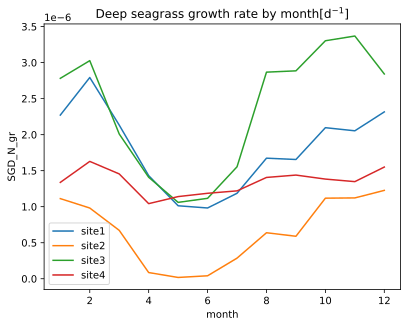

In [87]:
#define a function based on time

def time_mean1(a): 
    return a.mean(dim='time')

plt.subplot(1, 1,1) #create a plot

ll =[gb1,gb2,gb3,gb4] #create a list include all of datasets splitting 

for i in range(4):
    ll[i].apply(time_mean1) 
    a = ll[i].mean(dim='time') #month average in the list
    a.SGD_N_gr.mean(dim=('i','j')).plot() #plot figure between 2 varaibles
    
    plt.legend(['site1','site2','site3','site4'],loc='best')
    plt.title('Deep seagrass growth rate by month'+r"[d$^{-1}$]")
plt.show()



# Seperate dataset by years

This section analyzes the seagrass growth rate in different years in each site. Climate change is a constant event, we want to test how the seagrass growth rate difference in different years. For the processes, we extract data based on the years and plot time series for the seagrass growth rate for each site.

In [81]:
def time_mean(a): #calculate mean based on month
    return a.mean(dim='time')

def seagYear(data,years): #define a function including dataset and years
    timemean = []
    for k in range(len(years)):
        growth = data.SGD_N_gr.sel(time=years[k]) #select data based on different years
        gb = growth.groupby(growth.time.dt.month) #split the 'time' variable into month
        gb.apply(time_mean) #apply time_mean function
        timemean.append(gb.mean(dim='time')) #add month mean value in the list

    return timemean

#create a function including study site and years
def SitesData(Sites,years):
    Sitedata = []
    for k in range(len(Sites)):#create a loop function for seperate data in different years and sites
        Sitedata.append(seagYear(Sites[k],years))
        
    return Sitedata

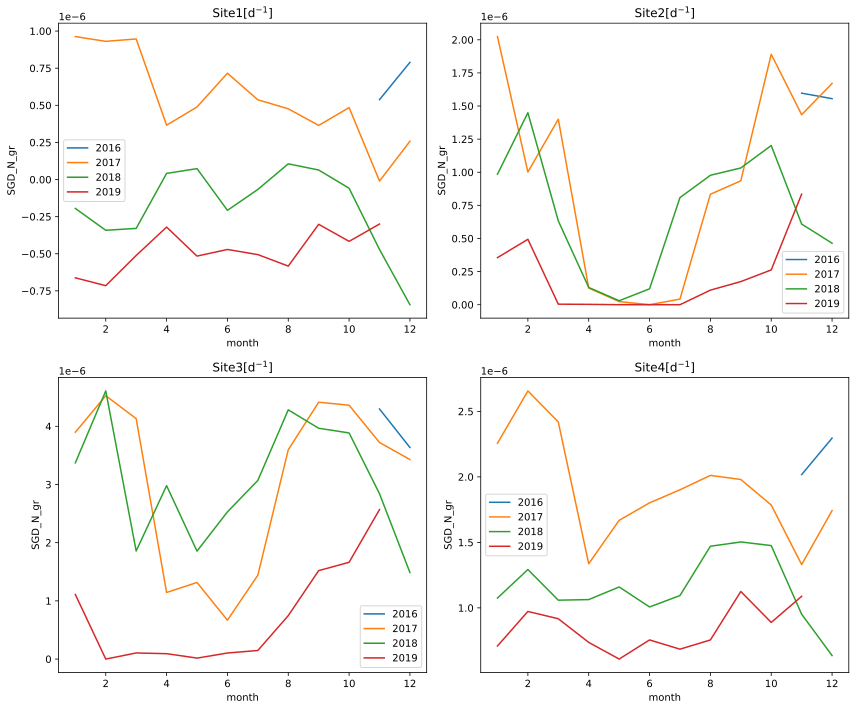

In [88]:
fig = plt.figure(figsize=(12, 10), dpi=200) #create plot

#making two lists for study area and years
Sites = [data1,data2,data3,data4]
years = ['2016','2017','2018','2019']

SiteData = SitesData(Sites,years) #define a function

for i in range(4):
    
    plt.subplot(2, 2,i+1) #plot order
    SiteData[i][0].mean(dim=('i','j')).plot()
    SiteData[i][1].mean(dim=('i','j')).plot()
    SiteData[i][2].mean(dim=('i','j')).plot()
    SiteData[i][3].mean(dim=('i','j')).plot()
    plt.title('Site'+str(i+1)+r"[d$^{-1}$]")
    plt.legend(years)


plt.tight_layout()
plt.show()


# Relationship between seagrass growth rate, temperature, salinity and light

In this project, we consider impacts from temperature, salinity and light to deep seagrass growth rate. We consider effect of each varibale on deep seagrass growth rate in each month.

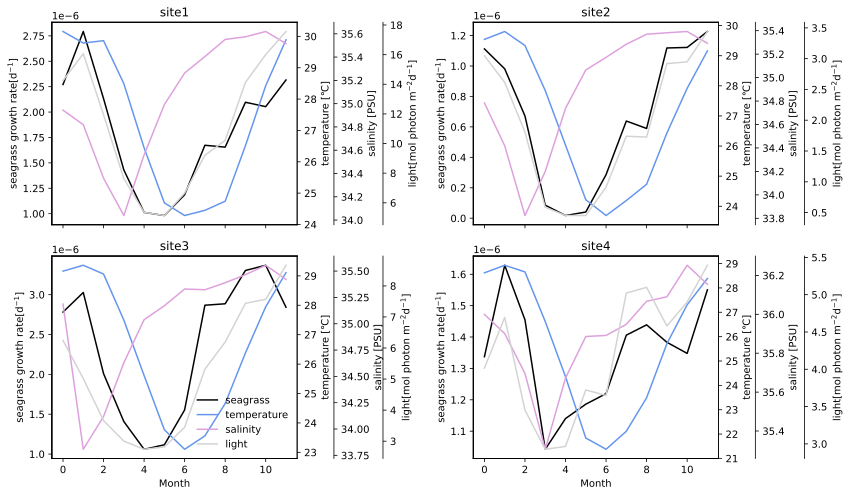

In [94]:
#create subplot
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12,7)) 
ax1=plt.subplot(2,2,1)   
ax2=plt.subplot(2,2,2)    
ax3=plt.subplot(2,2,3)   
ax4=plt.subplot(2,2,4) 
    

plt.subplots_adjust(wspace=0.8,hspace=0.4) #subplot's space
ls =[ax1,ax2,ax3,ax4]

for i in range(len(ls)):
    data = ls[i] 
    data_2=data.twinx() #subplot shares x-axis
    data_3=data.twinx()
    data_4=data.twinx()
    ll[i].apply(time_mean1) #apply time_mean1 function in to the list
    a = ll[i].mean(dim='time')

    data.plot(a.SGD_N_gr.mean(dim=('i','j')),c='black') #plot figure
    data_2.plot(a.temp.mean(dim=('i','j')),c='cornflowerblue')
    data_3.plot(a.salt.mean(dim=('i','j')),c='plum')
    data_4.plot(a.EpiPAR_sg.mean(dim=('i','j')),c='lightgray')

    rspine = data_3.spines['right'] # the third y_axis location
    rspine_1 = data_4.spines['right']
    rspine.set_position(('axes',1.15)) #the fourth y_axis location 
    rspine_1.set_position(('axes',1.35))
    
    if i == 2:
            data_3.legend([data.get_lines()[0],data_2.get_lines()[0],data_3.get_lines()[0],
                   data_4.get_lines()[0]],['seagrass','temperature','salinity','light'],
                  loc='best',frameon=False, fontsize=10)
            data.set_xlabel('Month')
    if i == 3:
            data.set_xlabel('Month') #x_label
    
    data.set_ylabel('seagrass growth rate'+r"[d$^{-1}$]") #add y_axis name
    data_2.set_ylabel('temperature [℃]')
    data_3.set_ylabel('salinity [PSU]')
    data_4.set_ylabel('light'+r"[mol photon m$^{-2}$d$^{-1}$]")
    plt.title('site'+str(i+1))
    
plt.tight_layout()
fig.savefig('Relationships between variables.pdf',bbox_inches='tight')
plt.show()  

# Anomaly value

Normaly,the extreme weather lead to the temperature, salinity, and light anomalies, which may affect the deep-water seagrass growth rate. In this step, we extract the anomaly value of temperature, salinity, light and deep-water seagrass growth rate and compare the relationship between them.  

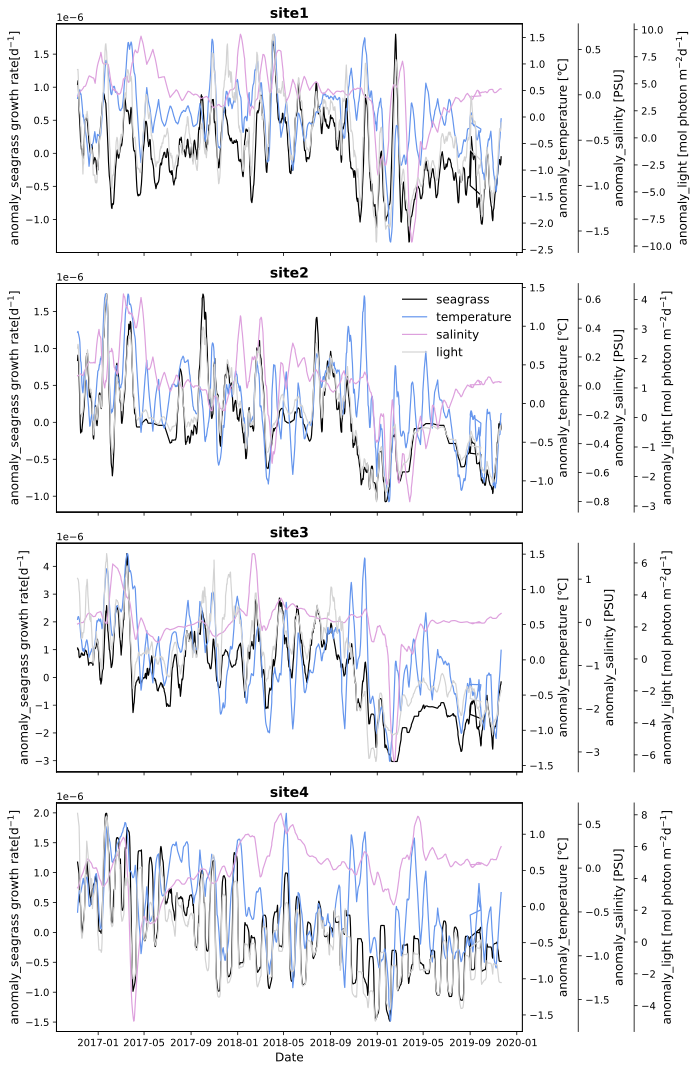

In [96]:
#create subplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,15),dpi=200, sharex=True)

def remove_time_mean(x): #define a function for anomaly calculation
    return x - x.mean(dim='time')

plt.subplots_adjust(wspace=0.4,hspace=0.3)
ls =[ax1,ax2,ax3,ax4]

for i in range(len(ls)):
    d1_anmo = ls[i]
    d1_anmo_2=d1_anmo.twinx() #share x-axis
    d1_anmo_3=d1_anmo.twinx()
    d1_anmo_4=d1_anmo.twinx()
    
    ds1_anom = ll[i].apply(remove_time_mean) #apply the anomaly value into the function

    data1 = ds1_anom.rolling(time=15, center=True).mean() #calculate mean value in 15 times
    
    d1_anmo.plot(data1.time,data1.SGD_N_gr.mean(dim=('i','j')),c='black',lw=1.2) #plot the figure
    d1_anmo_2.plot(data1.time,data1.temp.mean(dim=('i','j')),c='cornflowerblue',lw=1.2)
    d1_anmo_3.plot(data1.time,data1.salt.mean(dim=('i','j')),c='plum',lw=1.2)
    d1_anmo_4.plot(data1.time,data1.EpiPAR_sg.mean(dim=('i','j')),c='lightgray',lw=1.2)

    rspine = d1_anmo_3.spines['right'] #site y-axis position
    rspine_1 = d1_anmo_4.spines['right']
    rspine.set_position(('axes',1.12)) 
    rspine_1.set_position(('axes',1.24))
    
    if i == 1:
        d1_anmo_3.legend([d1_anmo.get_lines()[0],d1_anmo_2.get_lines()[0],d1_anmo_3.get_lines()[0],
                          d1_anmo_4.get_lines()[0]],['seagrass','temperature','salinity','light'],
                         loc='best',frameon=False, fontsize=12)

    if i == 3:
        d1_anmo.set_xlabel('Date', fontsize=12)
        
    d1_anmo.set_ylabel('anomaly_seagrass growth rate'+r"[d$^{-1}$]", fontsize=12)
    d1_anmo_2.set_ylabel('anomaly_temperature [℃]', fontsize=12)
    d1_anmo_3.set_ylabel('anomaly_salinity [PSU]', fontsize=12)
    d1_anmo_4.set_ylabel('anomaly_light'+r" [mol photon m$^{-2}$d$^{-1}$]", fontsize=12)
    plt.title('site'+str(i+1), fontsize=14, weight='bold')
    

fig.tight_layout() #choose the best location for legend
fig.savefig('anomaly_rolling_2weeks.pdf', dpi=300) #export plot as pdf


plt.show() 


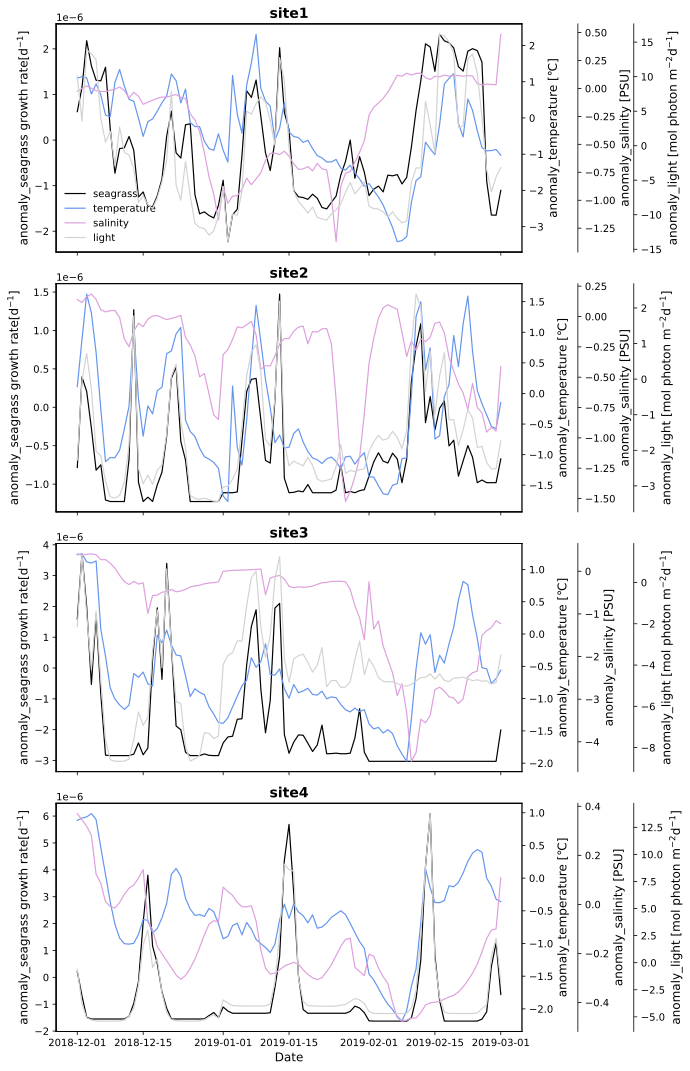

In [97]:
#set start time and end time for data extraction
import datetime
s_date = datetime.datetime.strptime('2018-12-01', '%Y-%m-%d').date()

e_date = datetime.datetime.strptime('2019-03-01', '%Y-%m-%d').date()

#create subplot
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, figsize=(10,15),dpi=200, sharex=True)

def remove_time_mean(x): #calculate anomaly value
    return x - x.mean(dim='time')

plt.subplots_adjust(wspace=0.4,hspace=0.3)
ls =[ax1,ax2,ax3,ax4]

for i in range(len(ls)):
    d1_anmo = ls[i]
    d1_anmo_2=d1_anmo.twinx()
    d1_anmo_3=d1_anmo.twinx()
    d1_anmo_4=d1_anmo.twinx()
    
    ds1_anom = ll[i].apply(remove_time_mean)#apply anomaly into the lo
    
    data1 = ds1_anom.rolling(time=1, center=True).mean() #calculate mean value in 15 times
    data1['time']= data1.time.dt.date
    data1 = data1.sel(time=slice(s_date,e_date))
    d1_anmo.plot(data1.time,data1.SGD_N_gr.mean(dim=('i','j')),c='black',lw=1.2)
    d1_anmo_2.plot(data1.time,data1.temp.mean(dim=('i','j')),c='cornflowerblue',lw=1.2)
    d1_anmo_3.plot(data1.time,data1.salt.mean(dim=('i','j')),c='plum',lw=1.2)
    d1_anmo_4.plot(data1.time,data1.EpiPAR_sg.mean(dim=('i','j')),c='lightgray',lw=1.2)

    rspine = d1_anmo_3.spines['right']
    rspine_1 = d1_anmo_4.spines['right']
    rspine.set_position(('axes',1.12))
    rspine_1.set_position(('axes',1.24))
    
    if i == 0:
        d1_anmo_3.legend([d1_anmo.get_lines()[0],d1_anmo_2.get_lines()[0],d1_anmo_3.get_lines()[0],
                          d1_anmo_4.get_lines()[0]],['seagrass','temperature','salinity','light'],
                         loc='best',frameon=False, fontsize=10)

    if i == 3:
        d1_anmo.set_xlabel('Date', fontsize=12)
    d1_anmo.set_ylabel('anomaly_seagrass growth rate'+r"[d$^{-1}$]", fontsize=12)
    d1_anmo_2.set_ylabel('anomaly_temperature [℃]', fontsize=12)
    d1_anmo_3.set_ylabel('anomaly_salinity [PSU]', fontsize=12)
    d1_anmo_4.set_ylabel('anomaly_light'+r" [mol photon m$^{-2}$d$^{-1}$]", fontsize=12)
    plt.title('site'+str(i+1), fontsize=14, weight='bold')
    
 
fig.tight_layout() #choose the best location for legend
fig.savefig('anomaly_19_1_2.pdf', dpi=300) #export plot

plt.show()

# Pearson correlation

Pearson correlation is used to measured the linear relationship between two datasets. The resulting coefficient is between -1 to +1. If the coefficient is 0, it means that there is no relationship between datasets. In this project, we use this function to detect whether the deep-water seagrass growth rate anomalies are related to light, temperature, and salinity anomalies. 



site 1 - anomaly pearson correlation

In [14]:
meansite1 = data1.mean(['j','i'])
#formula for anomaly
def remove_time_mean(x): 
    return x - x.mean(dim='time')
ds1_anom = meansite1.apply(remove_time_mean)

#calculate anomaly between two variables
#Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 1
anomaly_correlation1_temp=xr.corr(ds1_anom.SGD_N_gr, ds1_anom.temp)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 1:',anomaly_correlation1_temp)

#Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 1
anomaly_correlation1_salt=xr.corr(ds1_anom.SGD_N_gr, ds1_anom.salt)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 1:',anomaly_correlation1_salt)

#Pearson correlation of anomaly value between deep seagrass growth rate and light in site 1
anomaly_correlation1_light=xr.corr(ds1_anom.SGD_N_gr,ds1_anom.EpiPAR_sg)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 1:',anomaly_correlation1_light)

+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 1: <xarray.DataArray ()>
array(0.12142621)
+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 1: <xarray.DataArray ()>
array(-0.05042252)
+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 1: <xarray.DataArray ()>
array(0.9713329)


site 2 - anomaly pearson correlation

In [15]:
meansite2 = data2.mean(['j','i'])
#formula for anomaly
def remove_time_mean(x): 
    return x - x.mean(dim='time')
ds2_anom = meansite2.apply(remove_time_mean)

#calculate anomaly between two variables
#Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 2
anomaly_correlation2_temp=xr.corr(ds2_anom.SGD_N_gr, ds2_anom.temp) 
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 2:',anomaly_correlation2_temp)

#Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 2
anomaly_correlation2_salt=xr.corr(ds2_anom.SGD_N_gr, ds2_anom.salt)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 2:',anomaly_correlation2_salt)

#Pearson correlation of anomaly value between deep seagrass growth rate and light in site 2
anomaly_correlation2_light=xr.corr(ds2_anom.SGD_N_gr,ds2_anom.EpiPAR_sg)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 2:',anomaly_correlation2_light)

+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 2: <xarray.DataArray ()>
array(0.39744601)
+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 2: <xarray.DataArray ()>
array(0.2285515)
+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 2: <xarray.DataArray ()>
array(0.97629312)


site 3 - anomaly pearson correlation

In [16]:
meansite3 = data3.mean(['j','i'])
#formula for anomaly
def remove_time_mean(x): 
    return x - x.mean(dim='time')
ds3_anom = meansite3.apply(remove_time_mean)

#calculate anomaly between two variables
#Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 3
anomaly_correlation3_temp=xr.corr(ds3_anom.SGD_N_gr, ds3_anom.temp)  
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 3:',anomaly_correlation3_temp)

#Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 3
anomaly_correlation3_salt=xr.corr(ds3_anom.SGD_N_gr, ds3_anom.salt)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 3:',anomaly_correlation3_salt)

#Pearson correlation of anomaly value between deep seagrass growth rate and light in site 3
anomaly_correlation3_light=xr.corr(ds3_anom.SGD_N_gr,ds3_anom.EpiPAR_sg)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 3:',anomaly_correlation3_light)

+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 3: <xarray.DataArray ()>
array(0.28480176)
+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 3: <xarray.DataArray ()>
array(0.34893954)
+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 3: <xarray.DataArray ()>
array(0.83206716)


site 4 - anomaly pearson corrlation

In [17]:
meansite4 = data4.mean(['j','i'])
#formula for anomaly
def remove_time_mean(x): 
    return x - x.mean(dim='time')
ds4_anom = meansite4.apply(remove_time_mean)

#calculate anomaly between two variables
#Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 4
anomaly_correlation4_temp=xr.corr(ds4_anom.SGD_N_gr, ds4_anom.temp)  
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 4:',anomaly_correlation4_temp)

#Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 4
anomaly_correlation4_salt=xr.corr(ds4_anom.SGD_N_gr, ds4_anom.salt)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 4:',anomaly_correlation4_salt)

#Pearson correlation of anomaly value between deep seagrass growth rate and light in site 4
anomaly_correlation4_light=xr.corr(ds4_anom.SGD_N_gr,ds4_anom.EpiPAR_sg)
print('+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 4:',anomaly_correlation4_light)

+ Pearson correlation of anomaly value between deep seagrass growth rate and temperature in site 4: <xarray.DataArray ()>
array(0.09624704)
+ Pearson correlation of anomaly value between deep seagrass growth rate and salt in site 4: <xarray.DataArray ()>
array(0.06353648)
+ Pearson correlation of anomaly value between deep seagrass growth rate and light in site 4: <xarray.DataArray ()>
array(0.92558765)


# Heatmap

Compared with Pearson correlation, heatmap provides a more intuitive representation of the correlations between different variables. In this project, we use this function to detect the correlations between temperature,salinity, light and deep-water seagrass growth rate anomalies in each sites.   

/tmp/ipykernel_48/716494384.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cmap= 'flare',mask = np.triu(np.ones_like(corr1,dtype = np.bool)))
/tmp/ipykernel_48/716494384.py:23: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cmap= 'flare',mask = np.triu(np.ones_like(corr2,dtype = np.bool)))
/tmp/ipykernel_48/716494384.py:34: DeprecationWarning:

Text(0.5, 0.95, 'Relationship between anomaly of seagrass growth rate and temperature/ salinity/ light for 4 sites')

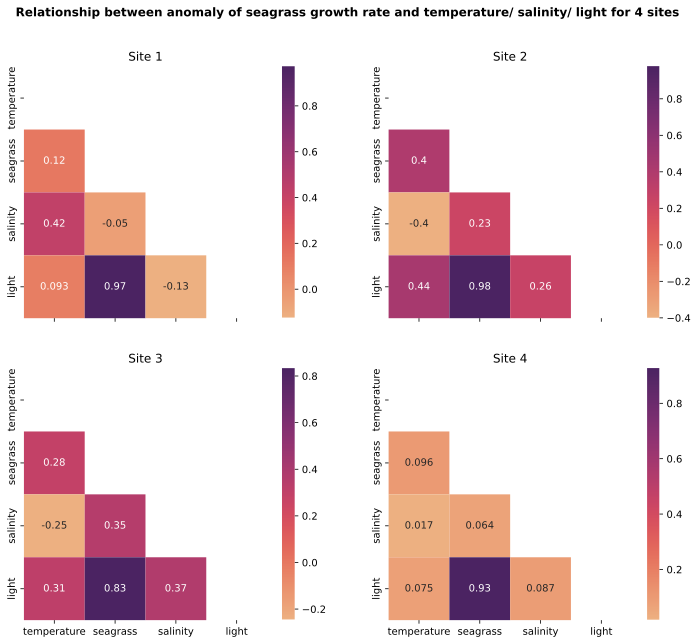

In [18]:
#creat subplot
fig, bx = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(12, 10))

##site 1

daf1 = ds1_anom.to_dataframe() #change to dataframe
df1=daf1.rename(columns={'temp':'temperature','salt':'salinity','SGD_N_gr':'seagrass','EpiPAR_sg':'light'})
corr1=df1.corr() #calculate correlation

plt.subplot(2,2,1)
plt.title('Site 1')
sns.heatmap(data=corr1,annot=True,
            cmap= 'flare',mask = np.triu(np.ones_like(corr1,dtype = np.bool)))

##site 2
daf2 = ds2_anom.to_dataframe() #change to dataframe
df2=daf2.rename(columns={'temp':'temperature','salt':'salinity','SGD_N_gr':'seagrass','EpiPAR_sg':'light'})
corr2=df2.corr() #calculate correlation

plt.subplot(2,2,2)
plt.title('Site 2')
sns.heatmap(data=corr2,annot=True,
            cmap= 'flare',mask = np.triu(np.ones_like(corr2,dtype = np.bool)))

##site 3

daf3 = ds3_anom.to_dataframe() #change to dataframe
df3=daf3.rename(columns={'temp':'temperature','salt':'salinity','SGD_N_gr':'seagrass','EpiPAR_sg':'light'})
corr3=df3.corr() #calculate correlation

plt.subplot(2,2,3)
plt.title('Site 3')
sns.heatmap(data=corr3,annot=True,
            cmap= 'flare',mask = np.triu(np.ones_like(corr3,dtype = np.bool)))

##site 4

daf4 = ds4_anom.to_dataframe() #change to dataframe
df4=daf4.rename(columns={'temp':'temperature','salt':'salinity','SGD_N_gr':'seagrass','EpiPAR_sg':'light'})
corr4=df4.corr() #calculate correlation

# Plot the heatmap
plt.subplot(2,2,4)
plt.title('Site 4')
sns.heatmap(data=corr4,annot=True,
            cmap= 'flare',mask = np.triu(np.ones_like(corr4,dtype = np.bool)))

fig.savefig('anomaly_heatmap.pdf', dpi=300)
fig.text(0.5, 0.95, 'Relationship between anomaly of seagrass growth rate and temperature/ salinity/ light for 4 sites',fontsize=12, ha='center',weight='bold')